In [10]:
#### OSCILADOR ARMÓNICO SIMPLE ASIMÉTRICO ####

import numpy as np
import matplotlib.pyplot as plt
from math import *

# Condiciones iniciales

x_0 = 1 # Posición inicial (arb)
v_0 = 0 # Velocidad inicial (arb)

# Definiciones iniciales

k = 20 # Número de veces que cambia la k en el movimiento del oscilador
sep = 100 # Número de puntos registrados en cada oscilación
t = k*sep # Instantes totales de tiempo en los que se registran el movimiento del oscilador
w = 1 # Frecuencia x>0
W = 50 # Frecuencia x<0

# Predefinimos las matrices donde guardaremos los resultados

x = np.zeros(t) # posiciones
v = np.zeros(t) # velocidades
T = np.zeros(k) # instantes donde x se hace cero
v_c = np.zeros(k) # velocidades donde x se hace cero

In [11]:
# Algoritmo para la obtención numérica de las raices de una función

# Definimos las soluciones iniciales del oscilador para poder encontrar numéricamente la primera raíz:

def f1(t):
    return x_0*np.cos(w*t)+v_0*np.sin(w*t)/w # Solución oscilador para x>0

def f2(t):
    return x_0*np.cos(W*t)+v_0*np.sin(W*t)/W # Solución oscilador para x<0

def bisección(a,b,tol,f): # Método de la bisección

    # f: ecuación que queremos resolver
    # tol: tolerancia deseada
    # a: punto inicial
    # b: punto primera iteración

    n = 0 # Iniciamos el número de iteraciones
    prec = abs(f(a)) 
    while tol<prec: # Realizamos iteraciones mientras la toleracia sea menor que la precisión de la solución actual
        c = a+((b-a)/2) # Calculamos un nuevo punto donde evaluar la función entre a y b
        if f(a)*f(c) < 0: # Renombramos los puntos según el signo que toma la función en cada punto
            b = c
        else:
            a = c
        prec = abs(f(c)) # Calculamos la precisión de la nueva solución
        n = n+1 # Contamos la iteración
    print('Bisección: La solución a la ecuación es t = ',c,', que tiene una precisión de al menos ',tol,' alcanzada con ',n,' iteraciones.', sep = "")
    return c

In [12]:
# Cálculo de posiciones y velocidades

if x_0 > 0 or (x_0 == 0 and v_0 >= 0): # Soluciones obtenidas analíticamente para el caso en el que el oscilador comienza a moverse hacia x>0

    if x_0 == 0:
        T[0] = pi/w # Caso para x_0 = 0 (a veces da problemas con el método numérico así que se indica la ráiz obtenida analíticamente)
    else:
        T[0] = bisección(1e-4,pi/w,1e-15,f1) # La primera solución para el resto de condiciones iniciales se obtiene numéricamente
        
    times = [] # Creamos una lista para almacenar los instantes de tiempo donde se calculan las posiciones y velocidades sin predefinir la dimensión
    per = np.linspace(0,T[0],sep) # Puntos de la primera oscilación
    times.append(per) # Se añaden los instantes al array del tiempo total

    v_c[0] = -w*x_0*np.sin(w*T[0])+v_0*np.cos(w*T[0]) # Se calcula la velocidad del oscilador al pasar por x = 0 la primera vez

    for i in range(np.size(per)): # Se calculan posiciones y velocidades (analíticamente) de la primera oscilación
        x[i] = x_0*np.cos(w*per[i])+(v_0/w)*np.sin(w*per[i])
        v[i] = -w*x_0*np.sin(w*per[i])+v_0*np.cos(w*per[i])

    for i in range(1,k): # Se repiten los mismos pasos anteriores para cada oscilación alternando las frecuencias angulares cada vez que se pase por x=0
        if i%2 == 1: # Para osciladciones impares (la primera es cero)
            T[i] = T[i-1]+pi/W # Se calcula el tiempo que tardará en volver a x=0
            per = np.linspace(0,T[i]-T[i-1],sep) # Se crean los siguientes instantes de tiempo y se almacenan
            times.append(per+T[i-1])
            v_c[i] = v_c[i-1]*np.cos(W*(T[i]-T[i-1])) # Se calcula la velocidad al pasar por x = 0
            for j in range(np.size(per)): # Se calculan posiciones y velocidades (con las nuevas soluciones)
                x[j+i*np.size(per)] = (v_c[i-1]/W)*np.sin(W*per[j])
                v[j+i*np.size(per)] = v_c[i-1]*np.cos(W*per[j])
            
        else: # Para la oscilaciones pares
            T[i] = T[i-1]+pi/w # Se calcula el tiempo que tardará en volver a x=0
            per = np.linspace(0,T[i]-T[i-1],sep) # Se crean los siguientes instantes de tiempo y se almacenan
            times.append(per+T[i-1])
            v_c[i] = v_c[i-1]*np.cos(w*(T[i]-T[i-1])) # Se calcula la velocidad al pasar por x = 0
            for j in range(np.size(per)): # Se calculan posiciones y velocidades (con las nuevas soluciones)
                x[j+i*np.size(per)] = (v_c[i-1]/w)*np.sin(w*per[j])
                v[j+i*np.size(per)] = v_c[i-1]*np.cos(w*per[j])
                
else: # Soluciones obtenidas analíticamente para el caso en el que el oscilador comienza a moverse hacia x<0

# Todo es igual que en el caso anterior pero cambiando w por W

    if x_0 == 0: 
        T[0] = pi/W
    else:
        T[0] = bisección(1e-4,pi/W,1e-15,f2)

    times = []
    per = np.linspace(0,T[0],sep)
    times.append(per)

    v_c[0] = -W*x_0*np.sin(W*T[0])+v_0*np.cos(W*T[0])

    for i in range(np.size(per)):
        x[i] = x_0*np.cos(W*per[i])+(v_0/W)*np.sin(W*per[i])
        v[i] = -W*x_0*np.sin(W*per[i])+v_0*np.cos(W*per[i])

    for i in range(1,k):
        if i%2 == 0:
            T[i] = T[i-1]+pi/W
            per = np.linspace(0,T[i]-T[i-1],sep)
            times.append(per+T[i-1])
            v_c[i] = v_c[i-1]*np.cos(W*(T[i]-T[i-1]))
            for j in range(np.size(per)):
                x[j+i*np.size(per)] = (v_c[i-1]/W)*np.sin(W*per[j])
                v[j+i*np.size(per)] = v_c[i-1]*np.cos(W*per[j])
            
        else:
            T[i] = T[i-1]+pi/w
            per = np.linspace(0,T[i]-T[i-1],sep)
            times.append(per+T[i-1])
            v_c[i] = v_c[i-1]*np.cos(w*(T[i]-T[i-1]))
            for j in range(np.size(per)):
                x[j+i*np.size(per)] = (v_c[i-1]/w)*np.sin(w*per[j])
                v[j+i*np.size(per)] = v_c[i-1]*np.cos(w*per[j])

tiempos = np.reshape(np.array(times),(int(np.size(times)))) # Convertimos la lista de tiempos en un array de una única fila

Bisección: La solución a la ecuación es t = 1.570796326794896, que tiene una precisión de al menos 1e-15 alcanzada con 49 iteraciones.


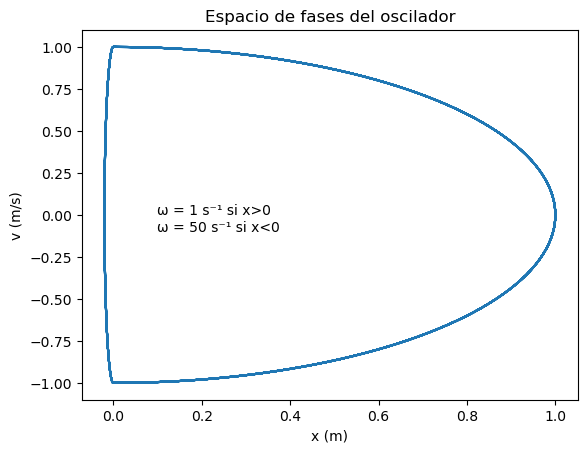

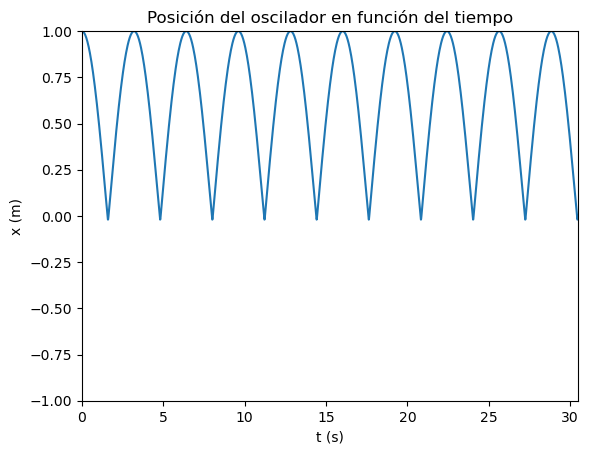

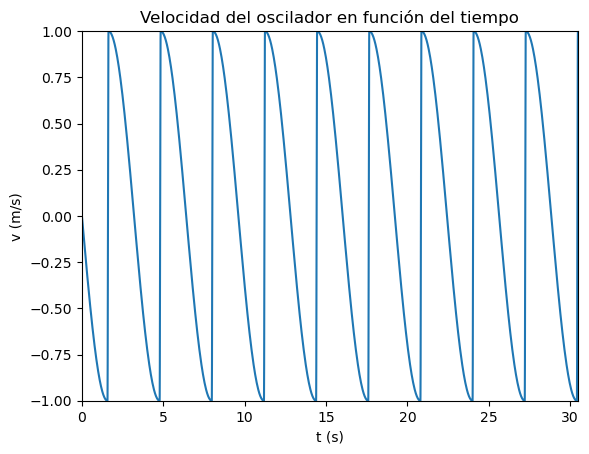

In [14]:
# Representación gráfica

# Figura 1: espacio de fases
plt.plot(x,v)
plt.xlabel('x (m)')
plt.ylabel('v (m/s)')
plt.title('Espacio de fases del oscilador')
plt.text(0.1,0,'ω = '+str(w)+' s⁻¹ si x>0')
plt.text(0.1,-.1,'ω = '+str(W)+' s⁻¹ si x<0')
plt.show()

# Figura 2: posición del oscilador
plt.plot(tiempos,x)
plt.xlabel('t (s)')
plt.ylabel('x (m)')
plt.title('Posición del oscilador en función del tiempo')
plt.xlim([0,max(T)])
plt.ylim([-max(abs(x)),max(abs(x))])
plt.show()

# Figura 3: velocidad del oscilador
plt.plot(tiempos,v)
plt.xlabel('t (s)')
plt.ylabel('v (m/s)')
plt.title('Velocidad del oscilador en función del tiempo')
plt.xlim([0,max(T)])
plt.ylim([-max(abs(v)),max(abs(v))])
plt.show()